# Построение сверточной сети для распознавания рукописных цифр

In [11]:
from tensorflow.keras.datasets import mnist #Библиотека с базой Mnist
from tensorflow.keras.models import Sequential #НС прямого распространения
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator # работа с изображениями
from tensorflow.keras.optimizers import Adam, Adadelta # оптимизаторы
from tensorflow.keras import utils #Используем дял to_categoricall
from tensorflow.keras.preprocessing import image #Для отрисовки изображений
from google.colab import files #Для загрузки своей картинки
import numpy as np #Библиотека работы с массивами
import matplotlib.pyplot as plt #Для отрисовки графиков
from PIL import Image #Для отрисовки изображений
import random #Для генерации случайных чисел 
import math # Для округления
import os #Для работы с файлами 
# подключем диск
from google.colab import drive
import pandas as pd
%matplotlib inline

In [12]:
#Загружаем mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Меняем формат данных MNIST
#Надо добавить в конце размерность 1
#Чтобы свёрточная сеть понимала, что это чёрно-белые данные
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Превращаем y_train и y_test в формат one hot encoding
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [13]:
# Размерности выборок
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


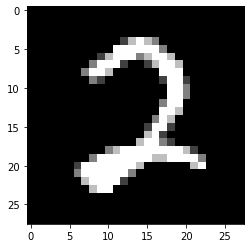

In [19]:
n_rec = 873 #Номер тестовой цифры для просмотра
plt.imshow(Image.fromarray(x_test[n_rec].reshape(28,28)).convert('RGBA')) # вывод картинки из тестового набора
plt.show()

Epoch 1/5
375/375 [==============================] - 29s 77ms/step - loss: 0.8490 - accuracy: 0.7322 - val_loss: 0.1051 - val_accuracy: 0.9681
Epoch 2/5
375/375 [==============================] - 29s 77ms/step - loss: 0.1666 - accuracy: 0.9461 - val_loss: 0.0780 - val_accuracy: 0.9752
Epoch 3/5
375/375 [==============================] - 29s 77ms/step - loss: 0.1229 - accuracy: 0.9603 - val_loss: 0.0637 - val_accuracy: 0.9792
Epoch 4/5
375/375 [==============================] - 29s 77ms/step - loss: 0.1004 - accuracy: 0.9675 - val_loss: 0.0555 - val_accuracy: 0.9829
Epoch 5/5
375/375 [==============================] - 29s 77ms/step - loss: 0.0857 - accuracy: 0.9727 - val_loss: 0.0487 - val_accuracy: 0.9858


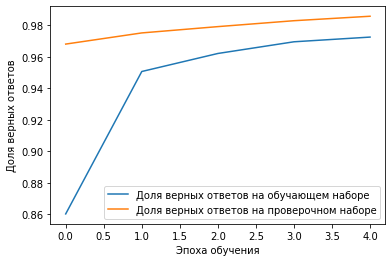

In [23]:
#задаём batch_size
batch_size = 128

#Создаем последовательную модель
model = Sequential()
#Слой пакетной нормализации
model.add(BatchNormalization(input_shape=(28, 28, 1)))
#Первый сверточный слой
model.add(Conv2D(4, 3, padding='same', activation='relu'))
#Второй сверточный слой
model.add(Conv2D(8, (3, 3), padding='same', activation='relu'))
#Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(4, 4)))
#Слой регуляризации Dropout
model.add(Dropout(0.25))

model.add(Flatten())
#Полносвязный слой для классификации
model.add(Dense(256, activation='relu'))
#Слой регуляризации Dropout
model.add(Dropout(0.25))
#Выходной полносвязный слой
model.add(Dense(10, activation='softmax'))

#Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#Обучаем сеть на данных mnist
history = model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=5,
                    validation_split=0.2,
                    verbose=1)

#Отображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [24]:
print(model.summary())

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_19 (Batc (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 28, 28, 4)         40        
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 28, 28, 8)         296       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 7, 7, 8)           0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 392)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 256)             

In [6]:
data = [['32-32', 'relu', 128, round(history.history['val_accuracy'][-1], 3)]]
data

[['32-32', 'relu', 128, 0.988]]

In [7]:
# 1

N = [2, 4, 16] # Кол-во фильтров в сверточных слоях

for i in N:
    for j in N[::-1]:
        model = Sequential()

        model.add(BatchNormalization(input_shape=(28, 28, 1)))
        model.add(Conv2D(i, (3, 3), padding='same', activation='relu')) # Меняем кол-во фильтров в сверточных слоях
        model.add(Conv2D(j, (3, 3), padding='same', activation='relu')) # Меняем кол-во фильтров в сверточных слоях
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))

        model.add(Flatten())
        model.add(Dense(256, activation='relu'))
        model.add(Dropout(0.25))
        model.add(Dense(10, activation='softmax'))

        # Компилируем сеть
        model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

        # Обучаем сеть 
        history = model.fit(x_train, 
                            y_train, 
                            batch_size=batch_size, 
                            epochs=10,
                            validation_split=0.2,
                            verbose=1)
        
        mod =str(i)+'-'+str(j)
        data = data + [[mod, 'relu', 128, round(history.history['val_accuracy'][-1], 3)]]


# 2

model = Sequential()

model.add(BatchNormalization(input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), padding='same', activation='linear')) # Меняем активационную функцию на linear
model.add(Conv2D(32, (3, 3), padding='same', activation='linear')) # Меняем активационную функцию на linear
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='linear'))                         # Меняем активационную функцию на linear
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

# Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Обучаем сеть 
history = model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=10,
                    validation_split=0.2,
                    verbose=1)

data = data + [['32-32', 'linear', 128, round(history.history['val_accuracy'][-1], 3)]]


# 3

N_batch_size = [32, 64, 128, 256]
for i in N_batch_size:
    model = Sequential()

    model.add(BatchNormalization(input_shape=(28, 28, 1)))
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(10, activation='softmax'))

    # Компилируем сеть
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    # Обучаем сеть 
    history = model.fit(x_train, 
                        y_train, 
                        batch_size=i,               # Меняем batch_size
                        epochs=10,
                        validation_split=0.2,
                        verbose=1)

    data = data + [['32-32', 'relu', i, round(history.history['val_accuracy'][-1], 3)]]

Epoch 1/10
375/375 [==============================] - 34s 89ms/step - loss: 0.5773 - accuracy: 0.8200 - val_loss: 0.0924 - val_accuracy: 0.9723
Epoch 2/10
375/375 [==============================] - 33s 88ms/step - loss: 0.1057 - accuracy: 0.9667 - val_loss: 0.0630 - val_accuracy: 0.9799
Epoch 3/10
375/375 [==============================] - 33s 88ms/step - loss: 0.0737 - accuracy: 0.9767 - val_loss: 0.0590 - val_accuracy: 0.9843
Epoch 4/10
375/375 [==============================] - 33s 89ms/step - loss: 0.0494 - accuracy: 0.9844 - val_loss: 0.0500 - val_accuracy: 0.9847
Epoch 5/10
375/375 [==============================] - 33s 88ms/step - loss: 0.0405 - accuracy: 0.9868 - val_loss: 0.0469 - val_accuracy: 0.9853
Epoch 6/10
375/375 [==============================] - 33s 88ms/step - loss: 0.0324 - accuracy: 0.9894 - val_loss: 0.0476 - val_accuracy: 0.9868
Epoch 7/10
375/375 [==============================] - 33s 89ms/step - loss: 0.0265 - accuracy: 0.9913 - val_loss: 0.0484 - val_accuracy:

In [9]:
df = pd.DataFrame(data, columns = ['filtres', 'activation', 'batch_size','val_accuracy'])
df

filtres activation  batch_size  val_accuracy
0    32-32       relu         128         0.988
1     2-16       relu         128         0.987
2      2-4       relu         128         0.984
3      2-2       relu         128         0.980
4     4-16       relu         128         0.989
5      4-4       relu         128         0.990
6      4-2       relu         128         0.983
7    16-16       relu         128         0.991
8     16-4       relu         128         0.988
9     16-2       relu         128         0.987
10   32-32     linear         128         0.973
11   32-32       relu          32         0.988
12   32-32       relu          64         0.989
13   32-32       relu         128         0.990
14   32-32       relu         256         0.990

In [26]:
model = Sequential()

model.add(BatchNormalization(input_shape=(28, 28, 1)))
model.add(Conv2D(4, (3, 3), padding='same', activation='relu')) # Меняем кол-во фильтров в сверточных слоях
model.add(Conv2D(4, (3, 3), padding='same', activation='relu')) # Меняем кол-во фильтров в сверточных слоях
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

# Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Обучаем сеть 
history = model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=20,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/20
375/375 [==============================] - 30s 80ms/step - loss: 0.6606 - accuracy: 0.7937 - val_loss: 0.1005 - val_accuracy: 0.9713
Epoch 2/20
375/375 [==============================] - 30s 79ms/step - loss: 0.1409 - accuracy: 0.9569 - val_loss: 0.0730 - val_accuracy: 0.9779
Epoch 3/20
375/375 [==============================] - 30s 79ms/step - loss: 0.1022 - accuracy: 0.9680 - val_loss: 0.0627 - val_accuracy: 0.9821
Epoch 4/20
375/375 [==============================] - 30s 79ms/step - loss: 0.0822 - accuracy: 0.9750 - val_loss: 0.0516 - val_accuracy: 0.9857
Epoch 5/20
375/375 [==============================] - 30s 79ms/step - loss: 0.0701 - accuracy: 0.9776 - val_loss: 0.0515 - val_accuracy: 0.9855
Epoch 6/20
375/375 [==============================] - 30s 79ms/step - loss: 0.0625 - accuracy: 0.9804 - val_loss: 0.0508 - val_accuracy: 0.9844
Epoch 7/20
375/375 [==============================] - 30s 80ms/step - loss: 0.0574 - accuracy: 0.9818 - val_loss: 0.0462 - val_accuracy:

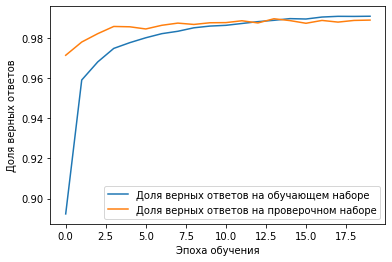

In [27]:
#Отображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [28]:
print(model.summary())

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_21 (Batc (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 28, 28, 4)         40        
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 28, 28, 4)         148       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 4)         0         
_________________________________________________________________
dropout_42 (Dropout)         (None, 14, 14, 4)         0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 256)             

In [34]:
# проверка на тестовой выборке
y_test_predict = np.argmax(model.predict(x_test), axis=1)
y_test_prop = y_test_predict == np.argmax(y_test, axis=1)
print('Количество верных ответов:',sum(y_test_prop)/len(y_test_prop)*100,'%')

Количество верных ответов: 98.9 %


In [35]:
# сохранение обученной нейросети
model.save('model.h5')